c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Herobrot\Documents\9Cua

=== Forecasting de citas por día ===
Métricas ARIMA:
  mse: 21.834
  rmse: 4.673
  mae: 4.062
  mape: 52.816
  smape: 38.085
  r2: -2.493
  theil_u: 0.200

Métricas Holt-Winters:
  mse: 21.278
  rmse: 4.613
  mae: 3.886
  mape: 51.344
  smape: 36.788
  r2: -2.404
  theil_u: 0.199


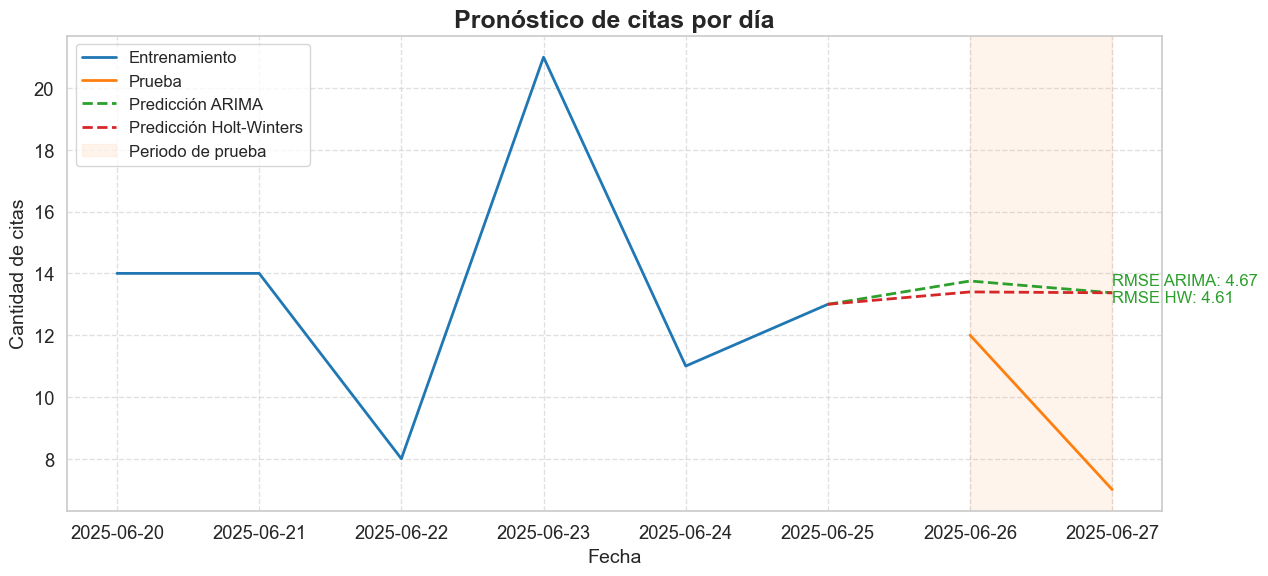

In [ ]:
import pandas as pd
import numpy as np
import os

# Importar modelos y métricas
from src.core.base_model import ARIMAModel, HoltWintersModel
from src.core.metrics import TimeSeriesMetrics

# 1. Cargar los datos limpios
ruta_data = '.'  # Ajusta si tus archivos están en otra carpeta

appointments = pd.read_csv(os.path.join(ruta_data, 'appointments_clean.csv'), parse_dates=['fecha_cita', 'created_at', 'updated_at'])
ai_clean = pd.read_csv(os.path.join(ruta_data, 'ai_clean.csv'), parse_dates=['created_at'])
tasks_clean = pd.read_csv(os.path.join(ruta_data, 'tasks_clean.csv'), parse_dates=['fecha_cita'])

# 2. Crear la serie temporal: cantidad de citas por día
appointments['fecha_cita'] = pd.to_datetime(appointments['fecha_cita'])
appointments_daily = appointments.groupby(appointments['fecha_cita'].dt.date).size()
appointments_daily.index = pd.to_datetime(appointments_daily.index)
appointments_daily = appointments_daily.sort_index()

# 3. Separar train/test (por ejemplo, 80% train, 20% test)
split_idx = int(len(appointments_daily) * 0.8)
train, test = appointments_daily.iloc[:split_idx], appointments_daily.iloc[split_idx:]

# 4. Entrenar modelo ARIMA
arima_model = ARIMAModel(order=(1,1,1))
arima_model.fit(train)
arima_pred = arima_model.predict(len(test))
arima_pred.index = test.index  # Alinear índices

# 5. Entrenar modelo Holt-Winters
hw_model = HoltWintersModel(seasonal_periods=7, trend='add', seasonal=None, damped_trend=False)
hw_model.fit(train)
hw_pred = hw_model.predict(len(test))
hw_pred.index = test.index  # Alinear índices

# 6. Calcular métricas de forecasting
arima_metrics = TimeSeriesMetrics.calculate_forecast_accuracy(test, arima_pred)
hw_metrics = TimeSeriesMetrics.calculate_forecast_accuracy(test, hw_pred)

print("=== Forecasting de citas por día ===")
print("Métricas ARIMA:")
for k, v in arima_metrics.items():
    print(f"  {k}: {v:.3f}")
print("\nMétricas Holt-Winters:")
for k, v in hw_metrics.items():
    print(f"  {k}: {v:.3f}")

import matplotlib.pyplot as plt
import seaborn as sns

# Concatenar el último valor real de entrenamiento con la predicción para continuidad visual
arima_pred_full = pd.concat([train[-1:], arima_pred])
arima_pred_full.index = train[-1:].index.append(arima_pred.index)

hw_pred_full = pd.concat([train[-1:], hw_pred])
hw_pred_full.index = train[-1:].index.append(hw_pred.index)

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento', color='#1f77b4', linewidth=2)
plt.plot(test.index, test, label='Prueba', color='#ff7f0e', linewidth=2)
plt.plot(arima_pred_full.index, arima_pred_full, label='Predicción ARIMA', color='#2ca02c', linestyle='--', linewidth=2)
plt.plot(hw_pred_full.index, hw_pred_full, label='Predicción Holt-Winters', color='#d62728', linestyle='--', linewidth=2)
plt.axvspan(test.index[0], test.index[-1], color='#ff7f0e', alpha=0.08, label='Periodo de prueba')
plt.title('Pronóstico de citas por día', fontsize=18, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Cantidad de citas', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.text(test.index[int(len(test)/2)], max(test.max(), arima_pred_full.max(), hw_pred_full.max())*0.95, 
         f"RMSE ARIMA: {arima_metrics['rmse']:.2f}\nRMSE HW: {hw_metrics['rmse']:.2f}", 
         fontsize=12, color='#2ca02c')

plt.savefig('citas_forecasting.png')

plt.show()

c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


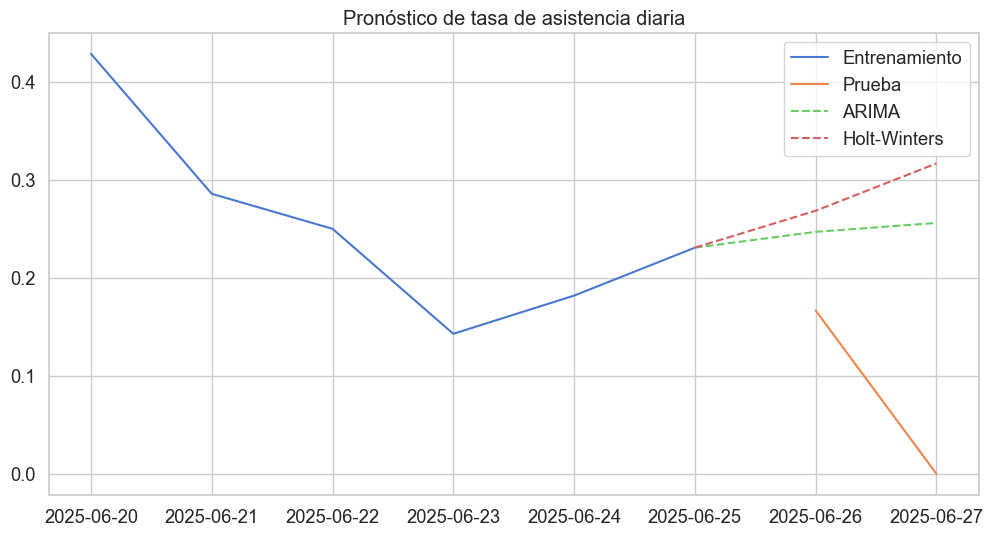

In [ ]:
# Calcular tasa de asistencia diaria
appointments['asistio'] = appointments['estado_cita'] == 'completada'
asistencia_diaria = appointments.groupby(appointments['fecha_cita'].dt.date)['asistio'].mean()
asistencia_diaria.index = pd.to_datetime(asistencia_diaria.index)
asistencia_diaria = asistencia_diaria.sort_index()

# Separar train/test
split_idx = int(len(asistencia_diaria) * 0.8)
train, test = asistencia_diaria.iloc[:split_idx], asistencia_diaria.iloc[split_idx:]

# ARIMA
arima_model = ARIMAModel(order=(1,1,1))
arima_model.fit(train)
arima_pred = arima_model.predict(len(test))
arima_pred.index = test.index

# Holt-Winters
hw_model = HoltWintersModel(seasonal_periods=7, trend='add', seasonal=None)
hw_model.fit(train)
hw_pred = hw_model.predict(len(test))
hw_pred.index = test.index

# Concatenar el último valor real de entrenamiento con la predicción
arima_pred_full = pd.concat([train[-1:], arima_pred])
arima_pred_full.index = train[-1:].index.append(arima_pred.index)

hw_pred_full = pd.concat([train[-1:], hw_pred])
hw_pred_full.index = train[-1:].index.append(hw_pred.index)

# Métricas
from src.core.metrics import TimeSeriesMetrics
arima_metrics = TimeSeriesMetrics.calculate_forecast_accuracy(test, arima_pred)
hw_metrics = TimeSeriesMetrics.calculate_forecast_accuracy(test, hw_pred)

# Gráfica
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento')
plt.plot(test.index, test, label='Prueba')
plt.plot(arima_pred_full.index, arima_pred_full, label='ARIMA', linestyle='--')
plt.plot(hw_pred_full.index, hw_pred_full, label='Holt-Winters', linestyle='--')
plt.title('Pronóstico de tasa de asistencia diaria')
plt.legend()

plt.savefig('asistencia_forecasting.png')

plt.show()

c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Herobrot\Documents\9Cua

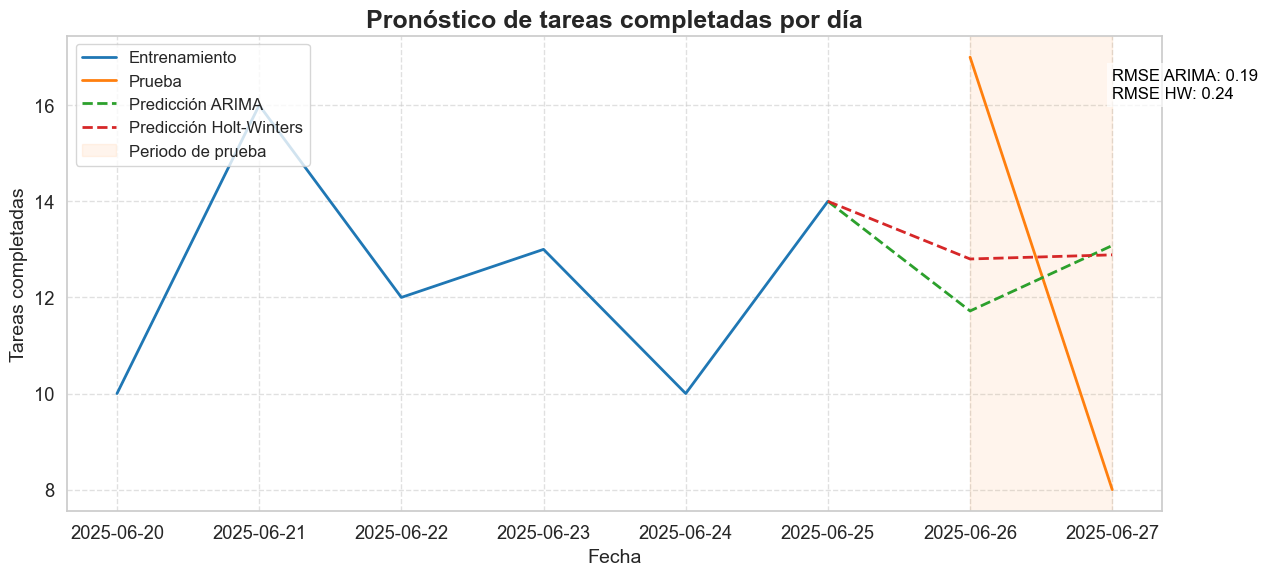

In [ ]:
# Calcular tareas completadas por día
tasks_clean['tarea_completada'] = tasks_clean['task_completed']
tareas_completadas_diario = tasks_clean.groupby(tasks_clean['fecha_cita'].dt.date)['tarea_completada'].sum()
tareas_completadas_diario.index = pd.to_datetime(tareas_completadas_diario.index)
tareas_completadas_diario = tareas_completadas_diario.sort_index()

# Separar train/test
split_idx = int(len(tareas_completadas_diario) * 0.8)
train, test = tareas_completadas_diario.iloc[:split_idx], tareas_completadas_diario.iloc[split_idx:]

# ARIMA
arima_model = ARIMAModel(order=(1,1,1))
arima_model.fit(train)
arima_pred = arima_model.predict(len(test))
arima_pred.index = test.index

# Holt-Winters
hw_model = HoltWintersModel(seasonal_periods=7, trend='add', seasonal=None)
hw_model.fit(train)
hw_pred = hw_model.predict(len(test))
hw_pred.index = test.index

import matplotlib.pyplot as plt
import seaborn as sns

# Concatenar el último valor real de entrenamiento con la predicción para continuidad visual
arima_pred_full = pd.concat([train[-1:], arima_pred])
arima_pred_full.index = train[-1:].index.append(arima_pred.index)

hw_pred_full = pd.concat([train[-1:], hw_pred])
hw_pred_full.index = train[-1:].index.append(hw_pred.index)

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento', color='#1f77b4', linewidth=2)
plt.plot(test.index, test, label='Prueba', color='#ff7f0e', linewidth=2)
plt.plot(arima_pred_full.index, arima_pred_full, label='Predicción ARIMA', color='#2ca02c', linestyle='--', linewidth=2)
plt.plot(hw_pred_full.index, hw_pred_full, label='Predicción Holt-Winters', color='#d62728', linestyle='--', linewidth=2)

# Área sombreada para el periodo de predicción (test)
plt.axvspan(test.index[0], test.index[-1], color='#ff7f0e', alpha=0.08, label='Periodo de prueba')

plt.title('Pronóstico de tareas completadas por día', fontsize=18, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Tareas completadas', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Anotar ambos RMSE en la gráfica
plt.text(test.index[int(len(test)/2)], 
         max(test.max(), arima_pred_full.max(), hw_pred_full.max())*0.95, 
         f"RMSE ARIMA: {arima_metrics['rmse']:.2f}\nRMSE HW: {hw_metrics['rmse']:.2f}", 
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.savefig('tareas_completadas_forecasting.png')

plt.show()

c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Herobrot\Documents\9Cuatri\prueba\mineria\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


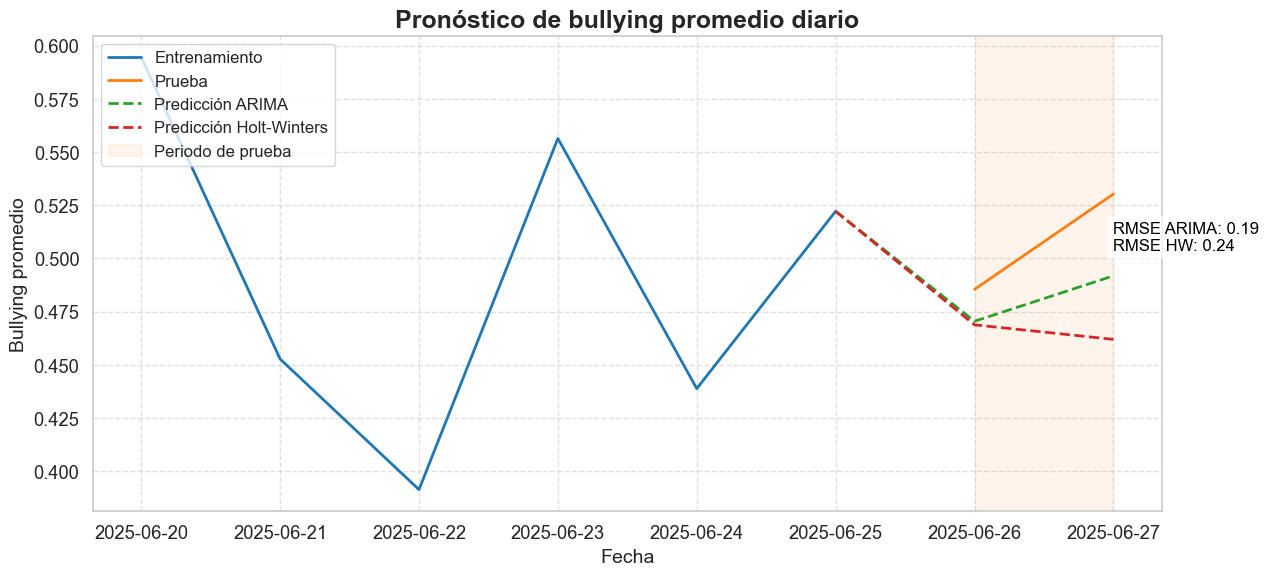

In [ ]:
# Calcular media diaria de bullying
ai_clean['bullying'] = pd.to_numeric(ai_clean['bullying'], errors='coerce')
bullying_diario = ai_clean.groupby(ai_clean['created_at'].dt.date)['bullying'].mean()
bullying_diario.index = pd.to_datetime(bullying_diario.index)
bullying_diario = bullying_diario.sort_index()

# Separar train/test
split_idx = int(len(bullying_diario) * 0.8)
train, test = bullying_diario.iloc[:split_idx], bullying_diario.iloc[split_idx:]

# ARIMA
arima_model = ARIMAModel(order=(1,1,1))
arima_model.fit(train)
arima_pred = arima_model.predict(len(test))
arima_pred.index = test.index

# Holt-Winters
hw_model = HoltWintersModel(seasonal_periods=7, trend='add', seasonal=None)
hw_model.fit(train)
hw_pred = hw_model.predict(len(test))
hw_pred.index = test.index

import matplotlib.pyplot as plt
import seaborn as sns

# Concatenar el último valor real de entrenamiento con la predicción para continuidad visual
arima_pred_full = pd.concat([train[-1:], arima_pred])
arima_pred_full.index = train[-1:].index.append(arima_pred.index)

hw_pred_full = pd.concat([train[-1:], hw_pred])
hw_pred_full.index = train[-1:].index.append(hw_pred.index)

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.2)

plt.figure(figsize=(12,6))
plt.plot(train.index, train, label='Entrenamiento', color='#1f77b4', linewidth=2)
plt.plot(test.index, test, label='Prueba', color='#ff7f0e', linewidth=2)
plt.plot(arima_pred_full.index, arima_pred_full, label='Predicción ARIMA', color='#2ca02c', linestyle='--', linewidth=2)
plt.plot(hw_pred_full.index, hw_pred_full, label='Predicción Holt-Winters', color='#d62728', linestyle='--', linewidth=2)

# Área sombreada para el periodo de predicción (test)
plt.axvspan(test.index[0], test.index[-1], color='#ff7f0e', alpha=0.08, label='Periodo de prueba')

plt.title('Pronóstico de bullying promedio diario', fontsize=18, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Bullying promedio', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Anotar ambos RMSE en la gráfica
plt.text(test.index[int(len(test)/2)], 
         max(test.max(), arima_pred_full.max(), hw_pred_full.max())*0.95, 
         f"RMSE ARIMA: {arima_metrics['rmse']:.2f}\nRMSE HW: {hw_metrics['rmse']:.2f}", 
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

plt.savefig('bullying_forecasting.png')

plt.show()